In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
# from lmphoton.simulation import current_simulation as sim
import pandas as pd

import sys
sys.path.append("../")

# SPPD optical elements
# from src.sppd_clm_optics import SPPDCLMOPTICS, SPPDCLMOPTICS_LAMBDA_AB
from src.sppd_clm_optics import SPPDCLMOPTICS_LAMBDA_AB

# PMIC drivers
from src.pikeriver_pmic import PMIC
# Calibration and control
from src.sppd_clm import CONTROLLER

plt.style.use("plot_style.mplstyle")
warnings.filterwarnings("ignore")

In [2]:
psi_matrix = pd.read_csv("../src/sppd_pic_psi_matrix.csv")
psi_array = psi_matrix.to_numpy()

In [3]:
psi_array @ np.ones(16)/16

array([2.59544712, 2.69600188, 2.75479684, 2.79766596, 2.83007909,
       2.853715  , 2.86925128, 2.87695578, 2.87695574, 2.86925132,
       2.85371496, 2.83007533, 2.79766023, 2.75479998, 2.69591065,
       2.59747951])

In [4]:
l1 = np.zeros(16)
l1[0] = 1
psi_array @ l1

array([21.51097509,  5.18068188,  3.59558395,  2.77738439,  2.20112626,
        1.74277203,  1.37261948,  1.07132833,  0.82501159,  0.62345302,
        0.45912196,  0.32673606,  0.22256461,  0.14362938,  0.08860502,
        0.06831928])

In [5]:
delta_current = 0.075
wpe = 0.18
current = 0.125

optical_power = 0.03
electrical_power  = optical_power/wpe

lost_power = electrical_power - optical_power
lost_power

0.13666666666666666

In [6]:
l1 = np.zeros(16)
l1[0] = lost_power
delta_T = psi_array @ l1
delta_nm_T = delta_T * 0.1e-9
delta_nm_current = 1/17*0.1e-9*delta_current*1e3

print(delta_T)
print(delta_nm_T/1e-9)
print(delta_nm_current/1e-9)

[2.93983326 0.70802652 0.49139647 0.37957587 0.30082059 0.23817884
 0.18759133 0.14641487 0.11275158 0.08520525 0.06274667 0.04465393
 0.03041716 0.01962935 0.01210935 0.00933697]
[0.29398333 0.07080265 0.04913965 0.03795759 0.03008206 0.02381788
 0.01875913 0.01464149 0.01127516 0.00852052 0.00627467 0.00446539
 0.00304172 0.00196293 0.00121094 0.0009337 ]
0.4411764705882352


In [7]:
l1 = np.ones(16) * lost_power
delta_T = psi_array @ l1
delta_nm_T = delta_T * 0.1e-9
delta_nm_current = 1/17 * 0.1e-9 * delta_current * 1e3

print(delta_T)
print(delta_nm_T/1e-9)
print(delta_nm_current/1e-9)
print(delta_current)

[5.67537771 5.89525745 6.02382242 6.1175629  6.18843961 6.24012346
 6.27409614 6.2909433  6.29094322 6.27409622 6.24012338 6.18843139
 6.11755037 6.02382929 5.89505796 5.67982187]
[0.56753777 0.58952574 0.60238224 0.61175629 0.61884396 0.62401235
 0.62740961 0.62909433 0.62909432 0.62740962 0.62401234 0.61884314
 0.61175504 0.60238293 0.5895058  0.56798219]
0.4411764705882352
0.075


In [8]:
target_grid_array = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9 

wavelength_fabrication = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9

_sppd_clm_optics_all = SPPDCLMOPTICS_LAMBDA_AB(
  target_grid_array = target_grid_array,
  wavelength_fabrication= wavelength_fabrication,
  bw_lambda = 0.1e-9,
  name = "SPPDCLMOPTICS_LAMBDA_AB"
  )
current_array = np.ones(16) * 0.133
_sppd_clm_optics_all.update(tc = 273+44.9, i_array=current_array)
for idd_laser in range(len(current_array)):
  print(f"{idd_laser}: {_sppd_clm_optics_all._lambda_array[idd_laser]*1e9:0.2f} nm")
for idd_target_wavelength in range(len(target_grid_array)):
  print(f"{idd_target_wavelength}: {_sppd_clm_optics_all._mpd_current_array[idd_target_wavelength]*1e6:0.2f} uA")

0: 1301.45 nm
1: 1302.61 nm
2: 1303.75 nm
3: 1304.90 nm
4: 1306.05 nm
5: 1307.19 nm
6: 1308.33 nm
7: 1309.48 nm
8: 1310.62 nm
9: 1311.77 nm
10: 1312.92 nm
11: 1314.06 nm
12: 1315.20 nm
13: 1316.35 nm
14: 1317.49 nm
15: 1318.62 nm
0: 237.63 uA
1: 238.08 uA
2: 236.93 uA
3: 235.37 uA
4: 233.90 uA
5: 232.66 uA
6: 232.00 uA
7: 230.99 uA
8: 230.94 uA
9: 231.85 uA
10: 232.91 uA
11: 233.68 uA
12: 235.48 uA
13: 236.96 uA
14: 238.08 uA
15: 237.64 uA


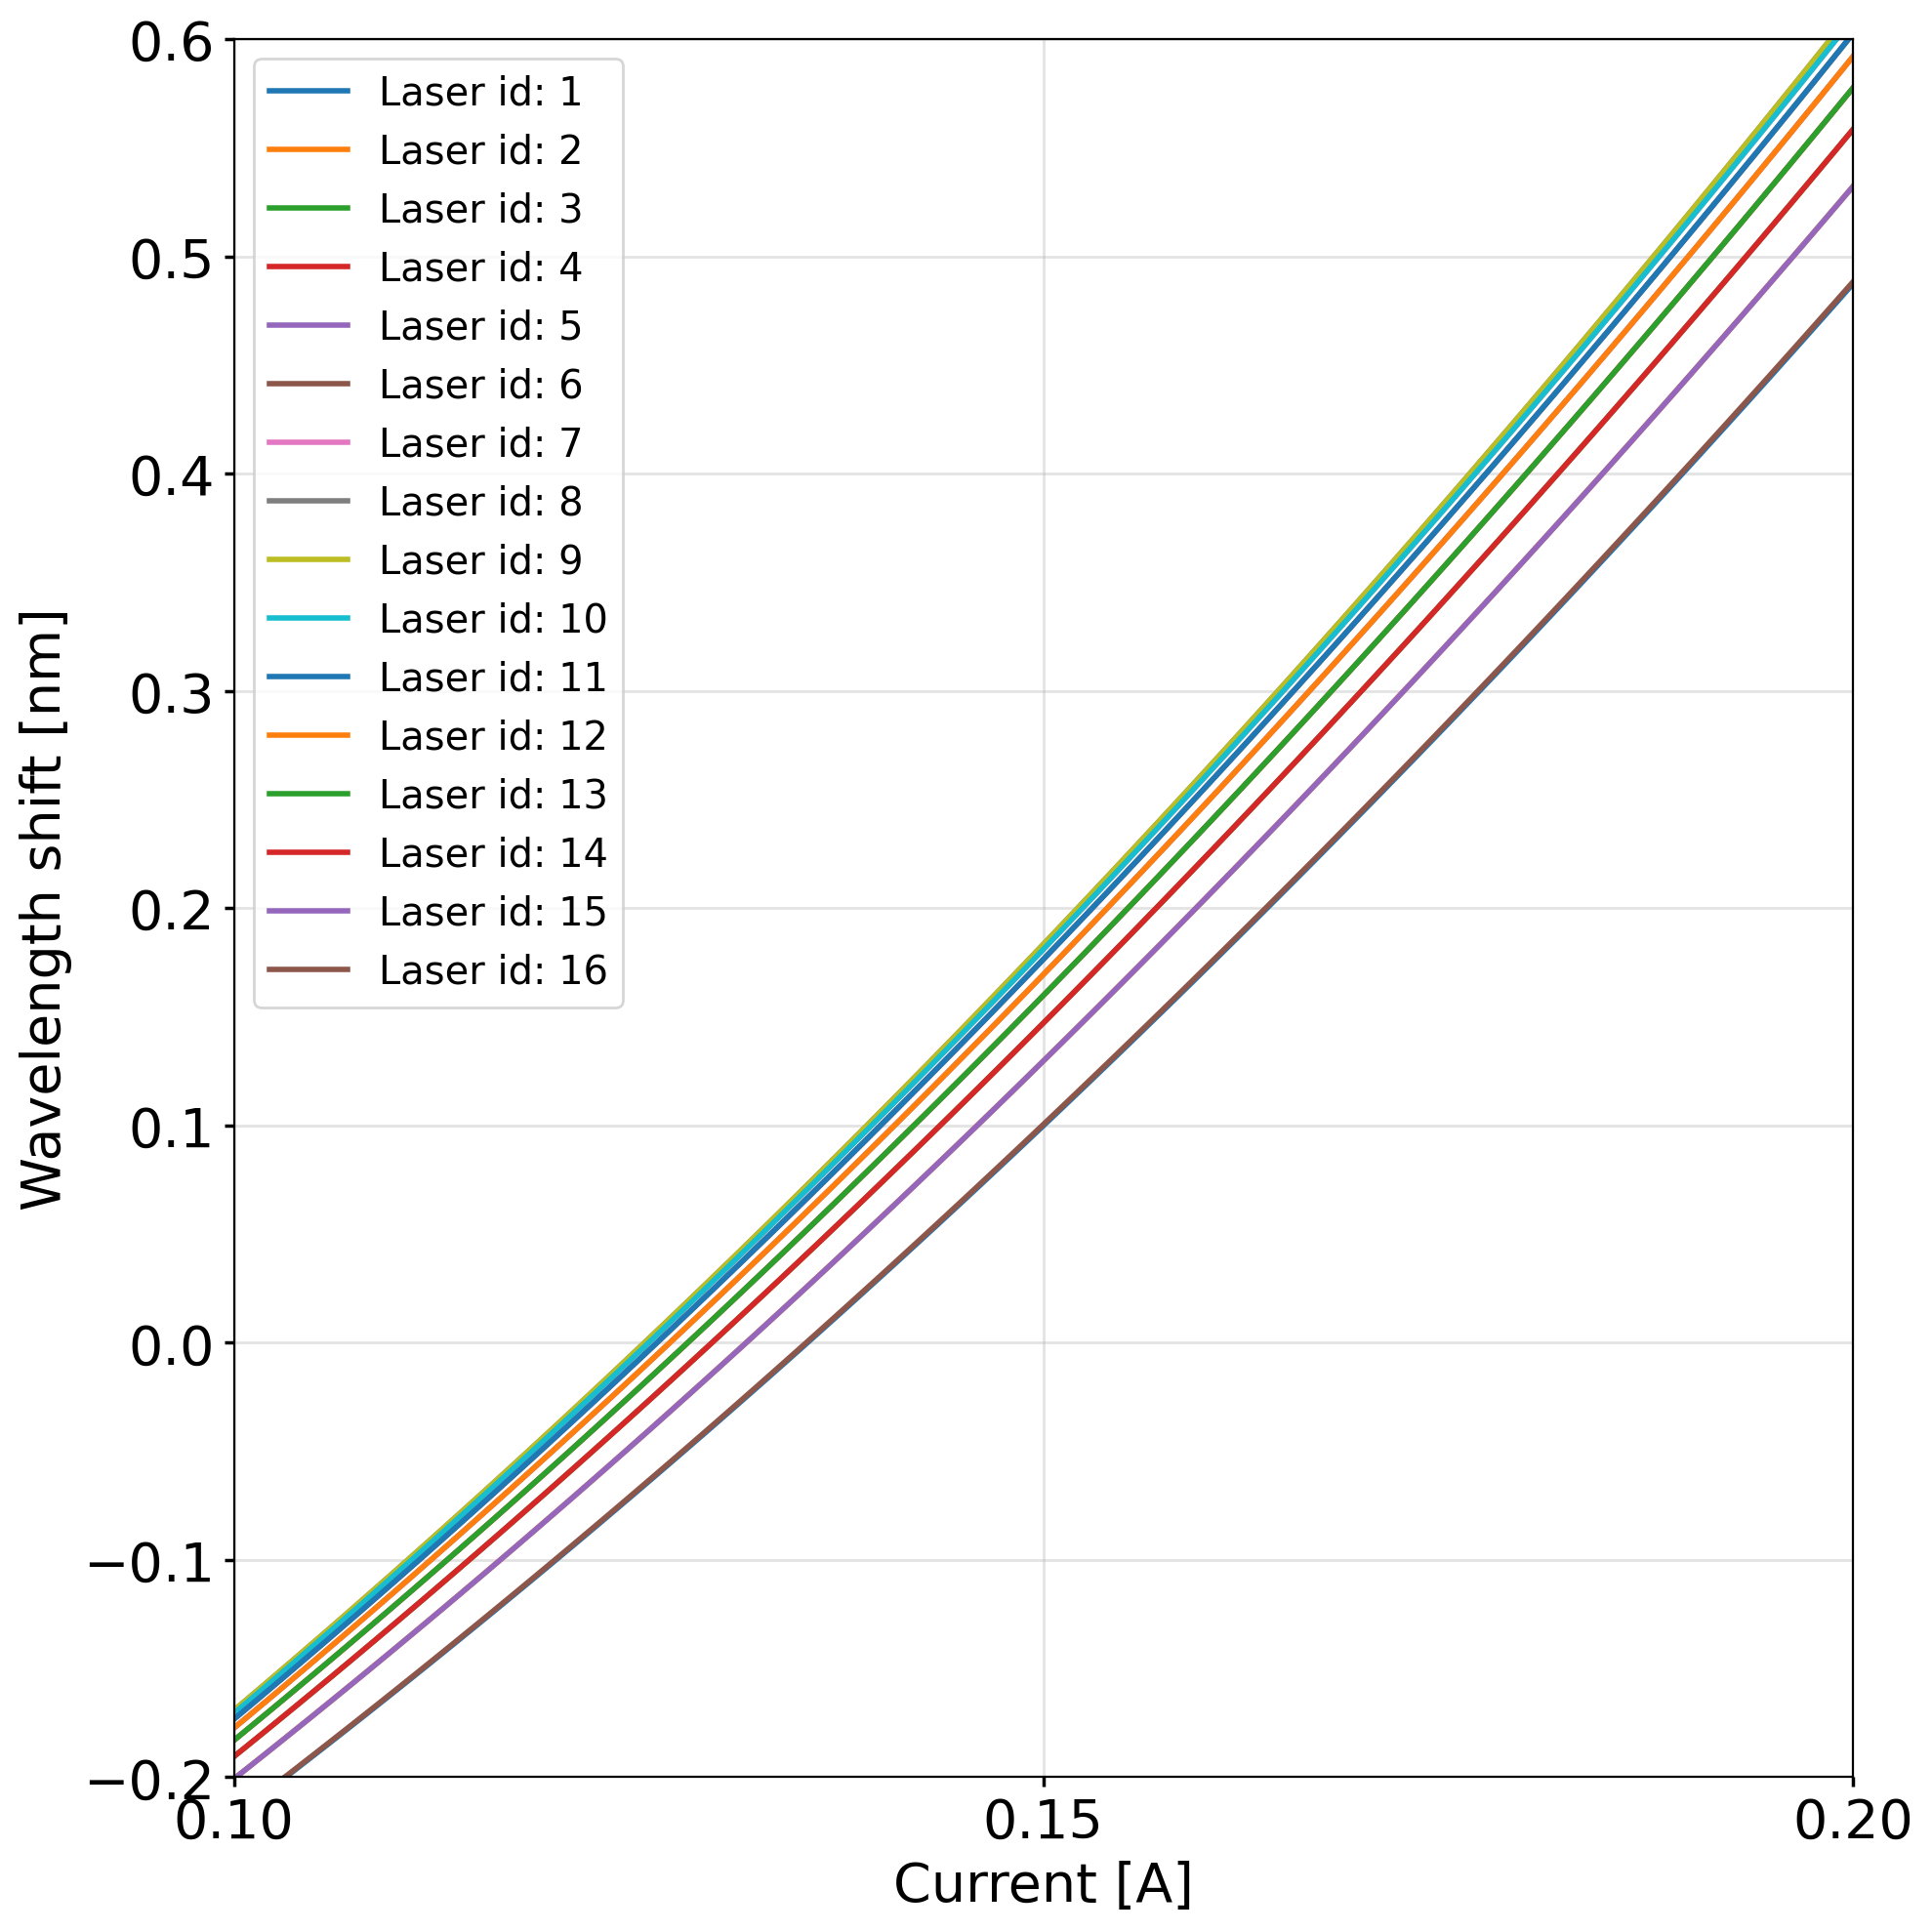

In [9]:
current_range = np.linspace(0.1, 0.2, 101)
current_array = np.ones(16) * 0.133
wavelength_combo = []
for idd_current in range(len(current_range)):
  current_array = np.ones(16) * current_range[idd_current]
  _sppd_clm_optics_all.update(tc = 273+44.90, i_array=current_array)
  wavelength_combo.append(_sppd_clm_optics_all._lambda_array*1e9)

wavelength_combo = np.array(wavelength_combo).reshape(len(current_range), 16)
plt.figure(figsize=(10,10))
for idd_laser in range(16):
  plt.plot(current_range, wavelength_combo[:,idd_laser]-wavelength_fabrication[idd_laser]*1e9, linewidth=2.0, label=f"Laser id: {idd_laser+1}")
  plt.xlabel("Current [A]")
  plt.ylabel("Wavelength shift [nm]")
  plt.grid(True)
  plt.xlim([0.1, 0.2])
  plt.xticks(np.arange(0.1, 0.25, 0.05))
  plt.ylim([-0.2, 0.6])
plt.legend()
plt.tight_layout()

In [10]:
current_array = np.ones(16) * 0.133
_sppd_clm_optics_all.update(tc = 273+44.9, i_array=current_array)

Calibration time: 1.54 s
Laser temp 0: 44.80 C, Enablence MPD current 0: 71.00, Pout 0: 14.14 mW, Lambda 0: 1301.45 nm, Drive current 0: 133.76 mA
Laser temp 1: 44.80 C, Enablence MPD current 1: 87.00, Pout 1: 14.11 mW, Lambda 1: 1302.61 nm, Drive current 1: 133.93 mA
Laser temp 2: 44.40 C, Enablence MPD current 2: 76.00, Pout 2: 14.36 mW, Lambda 2: 1303.72 nm, Drive current 2: 135.83 mA
Laser temp 3: 44.40 C, Enablence MPD current 3: 85.00, Pout 3: 13.95 mW, Lambda 3: 1304.86 nm, Drive current 3: 132.73 mA
Laser temp 4: 44.40 C, Enablence MPD current 4: 68.00, Pout 4: 14.06 mW, Lambda 4: 1306.01 nm, Drive current 4: 133.18 mA
Laser temp 5: 44.40 C, Enablence MPD current 5: 79.00, Pout 5: 14.25 mW, Lambda 5: 1307.15 nm, Drive current 5: 134.98 mA
Laser temp 6: 44.40 C, Enablence MPD current 6: 94.00, Pout 6: 14.27 mW, Lambda 6: 1308.29 nm, Drive current 6: 134.73 mA
Laser temp 7: 44.40 C, Enablence MPD current 7: 84.00, Pout 7: 13.80 mW, Lambda 7: 1309.43 nm, Drive current 7: 130.89 mA

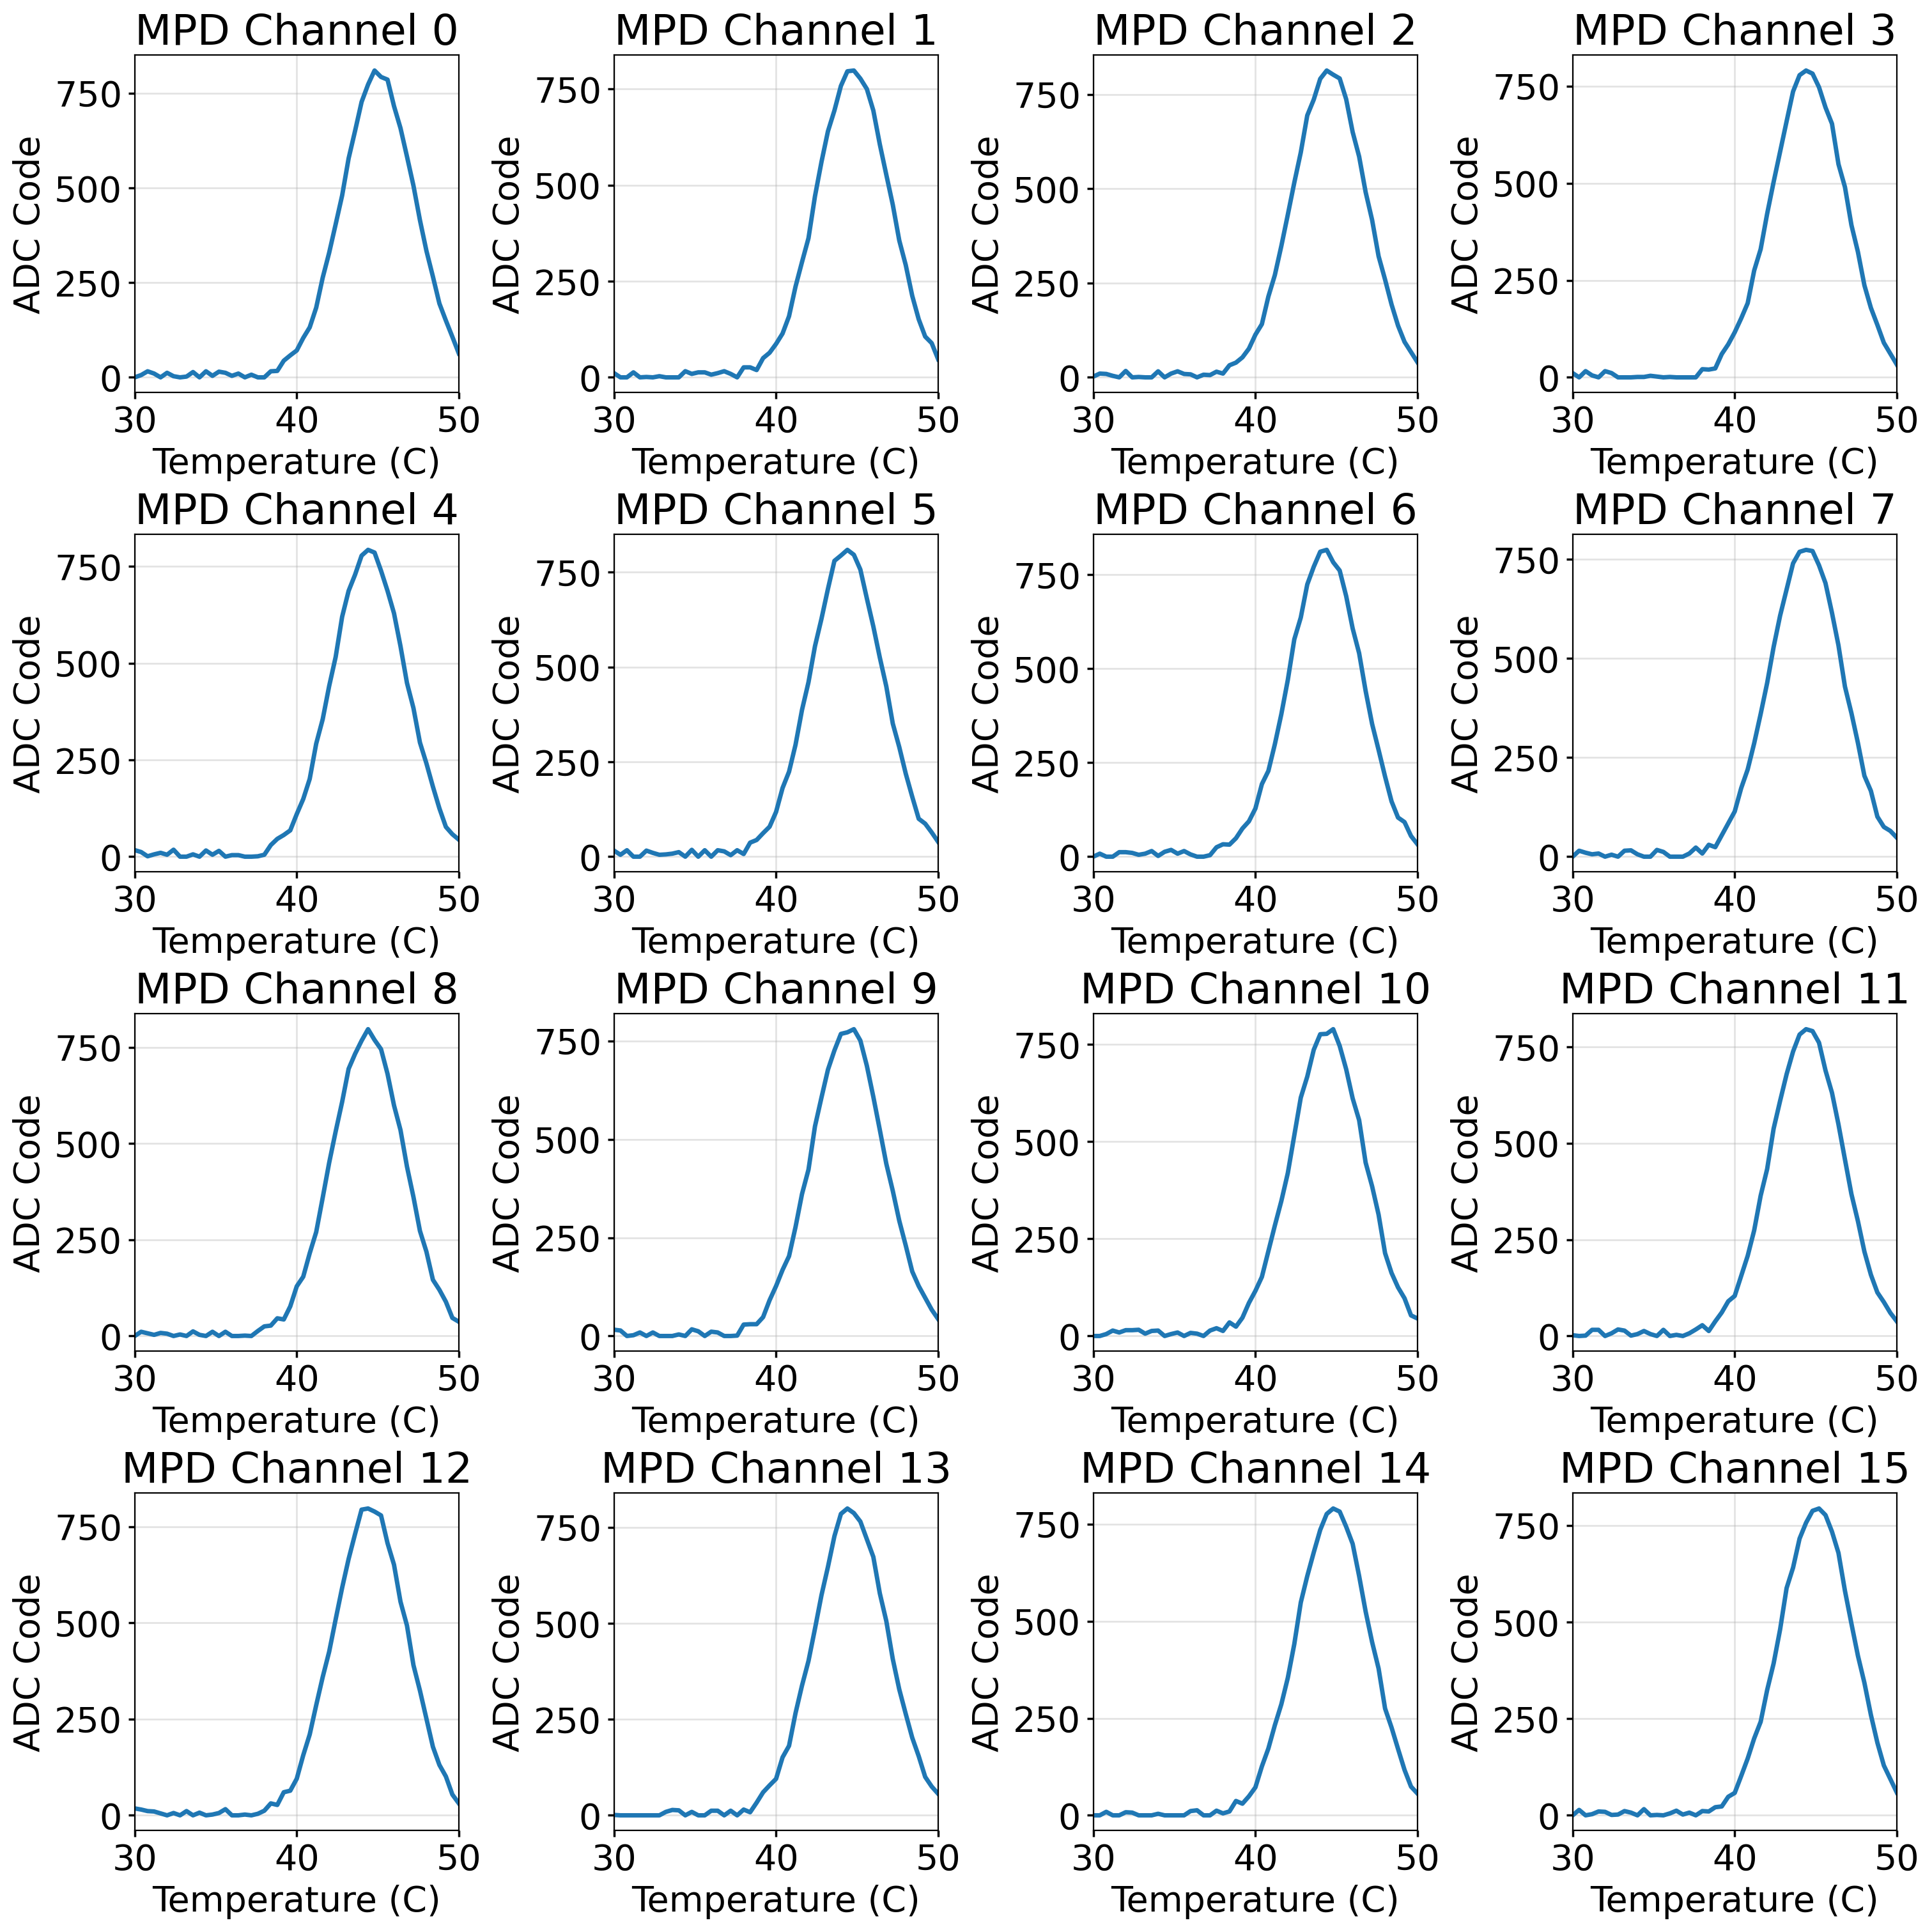

In [12]:
_pk_pmic = PMIC()

controller = CONTROLLER(
  sppd_clm_optics=_sppd_clm_optics_all,
  pmic = _pk_pmic,
  drive_current_array = current_array,
)
start = time.time()
controller.calibrate()
print(f"Calibration time: {time.time()-start:0.2f} s")

nom_temp_array = controller._nominal_temperature_array
tec_set_point_temperature = controller._tec_set_point_temperature
mux_current_array = controller._pmic_adc_enablence_mux_mpd_current_array
peak_current_array = controller._pmic_adc_enablence_mux_mpd_peak_current_array
output_power_array = controller._enablence_output_power_array
output_lambda_array = controller._lambda_array
current_array = controller._drive_current_array
cal_temperature_array = controller._temperature_array
drive_current_array = controller._pmic._dac_laser_drive_current_array

for idd_laser in range(16):
  print(f"Laser temp {idd_laser}: {nom_temp_array[idd_laser]-273:0.2f} C, Enablence MPD current {idd_laser}: {peak_current_array[idd_laser]:0.2f}, Pout {idd_laser}: {output_power_array[idd_laser]*1e3:0.2f} mW, Lambda {idd_laser}: {output_lambda_array[idd_laser]*1e9:0.2f} nm, Drive current {idd_laser}: {drive_current_array[idd_laser]*1e3:0.2f} mA")
print(f"TEC set point temperature: {tec_set_point_temperature-273:0.2f} C")

# Plot calibration per MUX channel (columns) and temperature (rows)
n_mpd_channels = len(target_grid_array)
# Set font size small
plt.rc('font', size=6)
fig, ax = plt.subplots(int(np.sqrt(n_mpd_channels)), int(np.sqrt(n_mpd_channels)), figsize=(15, 15))
for idd_mpd_channel in range(n_mpd_channels):
  _ax = ax[int(idd_mpd_channel/np.sqrt(n_mpd_channels)), int(idd_mpd_channel%np.sqrt(n_mpd_channels))]
  _ax.plot(cal_temperature_array-273, mux_current_array[:, idd_mpd_channel])
  _ax.set_xlim([30,50])
  _ax.set_xlabel("Temperature (C)")
  _ax.set_ylabel("ADC Code")
  _ax.set_title(f"MPD Channel {idd_mpd_channel}")

Calibration time: 1.56 s
Laser temp 0: 44.40 C, Enablence MPD current 0: 78.00, Pout 0: 13.98 mW, Lambda 0: 1301.44 nm, Drive current 0: 132.70 mA
Laser temp 1: 44.40 C, Enablence MPD current 1: 97.00, Pout 1: 14.36 mW, Lambda 1: 1302.61 nm, Drive current 1: 135.80 mA
Laser temp 2: 44.00 C, Enablence MPD current 2: 88.00, Pout 2: 15.25 mW, Lambda 2: 1303.74 nm, Drive current 2: 142.98 mA
Laser temp 3: 44.00 C, Enablence MPD current 3: 84.00, Pout 3: 14.37 mW, Lambda 3: 1304.88 nm, Drive current 3: 136.02 mA
Laser temp 4: 43.60 C, Enablence MPD current 4: 99.00, Pout 4: 15.33 mW, Lambda 4: 1306.02 nm, Drive current 4: 143.84 mA
Laser temp 5: 43.20 C, Enablence MPD current 5: 112.00, Pout 5: 16.23 mW, Lambda 5: 1307.15 nm, Drive current 5: 150.81 mA
Laser temp 6: 42.80 C, Enablence MPD current 6: 111.00, Pout 6: 17.31 mW, Lambda 6: 1308.28 nm, Drive current 6: 159.92 mA
Laser temp 7: 42.00 C, Enablence MPD current 7: 81.00, Pout 7: 18.62 mW, Lambda 7: 1309.39 nm, Drive current 7: 170.48 

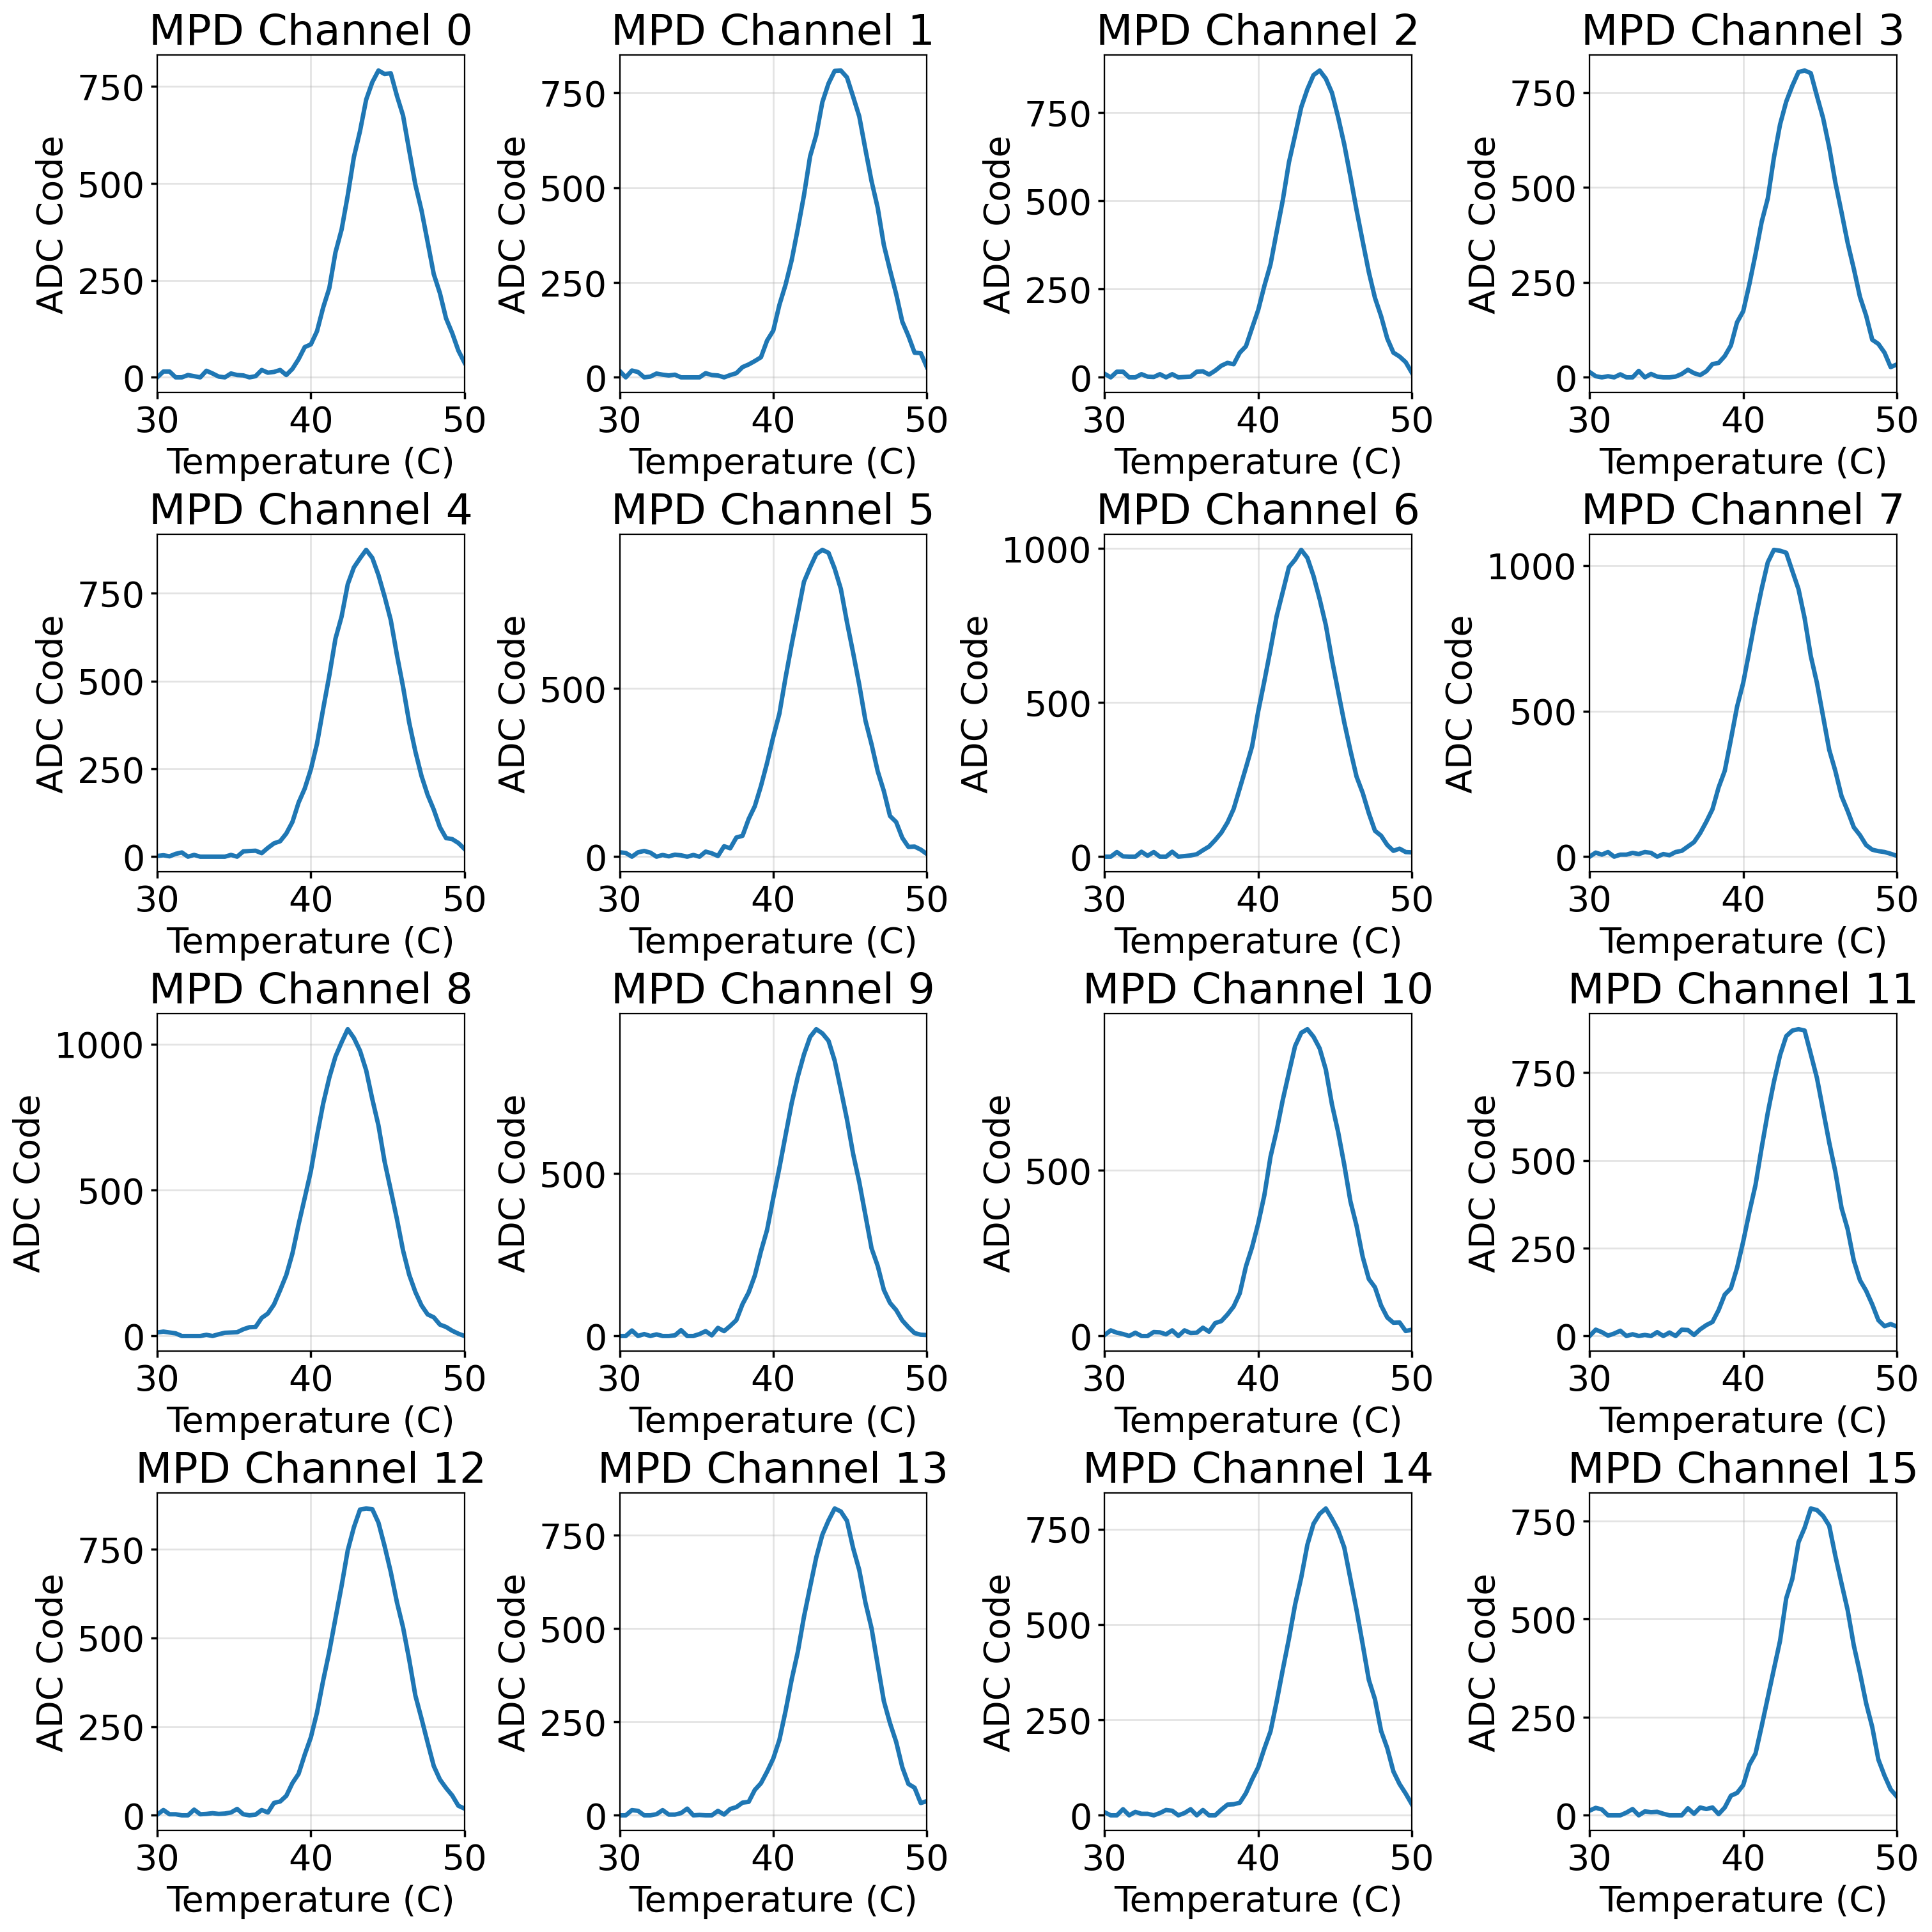

In [14]:
_pk_pmic = PMIC()

controller = CONTROLLER(
  sppd_clm_optics=_sppd_clm_optics_all,
  pmic = _pk_pmic,
  drive_current_array=current_array
)
start = time.time()
controller.calibrate(tc=273+44, power_wavelength_calibration=False)
print(f"Calibration time: {time.time()-start:0.2f} s")

nom_temp_array = controller._nominal_temperature_array
tec_set_point_temperature = controller._tec_set_point_temperature
mux_current_array = controller._pmic_adc_enablence_mux_mpd_current_array
peak_current_array = controller._pmic_adc_enablence_mux_mpd_peak_current_array
output_power_array = controller._enablence_output_power_array
output_lambda_array = controller._lambda_array
current_array = controller._drive_current_array
cal_temperature_array = controller._temperature_array
drive_current_array = controller._pmic._dac_laser_drive_current_array

for idd_laser in range(16):
  print(f"Laser temp {idd_laser}: {nom_temp_array[idd_laser]-273:0.2f} C, Enablence MPD current {idd_laser}: {peak_current_array[idd_laser]:0.2f}, Pout {idd_laser}: {output_power_array[idd_laser]*1e3:0.2f} mW, Lambda {idd_laser}: {output_lambda_array[idd_laser]*1e9:0.2f} nm, Drive current {idd_laser}: {drive_current_array[idd_laser]*1e3:0.2f} mA")
print(f"TEC set point temperature: {tec_set_point_temperature-273:0.2f} C")

# Plot calibration per MUX channel (columns) and temperature (rows)
n_mpd_channels = len(target_grid_array)
# Set font size small
plt.rc('font', size=6)
fig, ax = plt.subplots(int(np.sqrt(n_mpd_channels)), int(np.sqrt(n_mpd_channels)), figsize=(15, 15))
for idd_mpd_channel in range(n_mpd_channels):
  _ax = ax[int(idd_mpd_channel/np.sqrt(n_mpd_channels)), int(idd_mpd_channel%np.sqrt(n_mpd_channels))]
  _ax.plot(cal_temperature_array-273, mux_current_array[:, idd_mpd_channel])
  _ax.set_xlim([30,50])
  _ax.set_xlabel("Temperature (C)")
  _ax.set_ylabel("ADC Code")
  _ax.set_title(f"MPD Channel {idd_mpd_channel}")

In [ ]:
_pk_pmic = PMIC()

controller = CONTROLLER(
  sppd_clm_optics=_sppd_clm_optics_all,
  pmic = _pk_pmic,
)
start = time.time()
controller.calibrate(tc=273+35, power_wavelength_calibration=False)
print(f"Calibration time: {time.time()-start:0.2f} s")

nom_temp_array = controller._nominal_temperature_array
tec_set_point_temperature = controller._tec_set_point_temperature
mux_current_array = controller._pmic_adc_enablence_mux_mpd_current_array
peak_current_array = controller._pmic_adc_enablence_mux_mpd_peak_current_array
output_power_array = controller._enablence_output_power_array
output_lambda_array = controller._lambda_array
current_array = controller._drive_current_array
cal_temperature_array = controller._temperature_array
drive_current_array = controller._pmic._dac_laser_drive_current_array

for idd_laser in range(16):
  print(f"Laser temp {idd_laser}: {nom_temp_array[idd_laser]-273:0.2f} C, Enablence MPD current {idd_laser}: {peak_current_array[idd_laser]:0.2f}, Pout {idd_laser}: {output_power_array[idd_laser]*1e3:0.2f} mW, Lambda {idd_laser}: {output_lambda_array[idd_laser]*1e9:0.2f} nm, Drive current {idd_laser}: {drive_current_array[idd_laser]*1e3:0.2f} mA")
print(f"TEC set point temperature: {tec_set_point_temperature-273:0.2f} C")

# Plot calibration per MUX channel (columns) and temperature (rows)
n_mpd_channels = len(target_grid_array)
# Set font size small
plt.rc('font', size=6)
fig, ax = plt.subplots(int(np.sqrt(n_mpd_channels)), int(np.sqrt(n_mpd_channels)), figsize=(15, 15))
for idd_mpd_channel in range(n_mpd_channels):
  _ax = ax[int(idd_mpd_channel/np.sqrt(n_mpd_channels)), int(idd_mpd_channel%np.sqrt(n_mpd_channels))]
  _ax.plot(cal_temperature_array-273, mux_current_array[:, idd_mpd_channel])
  _ax.set_xlim([30,50])
  _ax.set_xlabel("Temperature (C)")
  _ax.set_ylabel("ADC Code")
  _ax.set_title(f"MPD Channel {idd_mpd_channel}")

In [ ]:
_pk_pmic = PMIC()

controller = CONTROLLER(
  sppd_clm_optics=_sppd_clm_optics_all,
  pmic = _pk_pmic,
)
start = time.time()
controller.calibrate(tc=273+35, drive_current_tuning=True)
print(f"Calibration time: {time.time()-start:0.2f} s")

nom_temp_array = controller._nominal_temperature_array
tec_set_point_temperature = controller._tec_set_point_temperature
mux_current_array = controller._pmic_adc_enablence_mux_mpd_current_array
peak_current_array = controller._pmic_adc_enablence_mux_mpd_peak_current_array
output_power_array = controller._enablence_output_power_array
output_lambda_array = controller._lambda_array
current_array = controller._drive_current_array
cal_temperature_array = controller._temperature_array
drive_current_array = controller._pmic._dac_laser_drive_current_array

for idd_laser in range(16):
  print(f"Laser temp {idd_laser}: {nom_temp_array[idd_laser]-273:0.2f} C, Enablence MPD current {idd_laser}: {peak_current_array[idd_laser]:0.2f}, Pout {idd_laser}: {output_power_array[idd_laser]*1e3:0.2f} mW, Lambda {idd_laser}: {output_lambda_array[idd_laser]*1e9:0.2f} nm, Drive current {idd_laser}: {drive_current_array[idd_laser]*1e3:0.2f} mA")
print(f"TEC set point temperature: {tec_set_point_temperature-273:0.2f} C")

# Plot calibration per MUX channel (columns) and temperature (rows)
n_mpd_channels = len(target_grid_array)
# Set font size small
plt.rc('font', size=6)
fig, ax = plt.subplots(int(np.sqrt(n_mpd_channels)), int(np.sqrt(n_mpd_channels)), figsize=(15, 15))
for idd_mpd_channel in range(n_mpd_channels):
  _ax = ax[int(idd_mpd_channel/np.sqrt(n_mpd_channels)), int(idd_mpd_channel%np.sqrt(n_mpd_channels))]
  _ax.plot(cal_temperature_array-273, mux_current_array[:, idd_mpd_channel])
  _ax.set_xlim([30,50])
  _ax.set_xlabel("Temperature (C)")
  _ax.set_ylabel("ADC Code")
  _ax.set_title(f"MPD Channel {idd_mpd_channel}")